In [22]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mel = pd.read_csv('/content/drive/MyDrive/Datafiles/Melbourne_housing.csv')

In [3]:
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
mel = mel.rename(columns={"Bedroom2":"Bedroom"})

In [7]:
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
mel.shape

(34857, 21)

In [8]:
mel.isna().sum()   #Count the missing values in each column

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [11]:
mel_df = mel.copy()   #Make a copy of original data for manipulations

In [13]:
mel_df.Price.fillna(mel_df.Price.mean(), inplace=True)    #Impute missing price values with average price value

In [24]:
mel_df.Distance.fillna(method='ffill', inplace=True)     #Impute missing ditance values with preceding distance value

In [25]:
mel_df.Postcode.fillna(method='ffill', inplace=True)     #Impute missing postcode values with preceding postcode value

In [30]:
mel_df.Bedroom.fillna(mel_df.Bedroom.mode()[0], inplace=True)    #Impute missing bedroom values with most common bedroom value

In [31]:
mel_df.Bathroom.fillna(mel_df.Bathroom.mode()[0], inplace=True)   #Impute missing bathroom values with most common bathroom value

In [32]:
mel_df.Car.fillna(mel_df.Car.mode()[0], inplace=True)       #Impute missing car values with most common car value

In [18]:
mel_df.Landsize.fillna(mel_df.Landsize.mean(), inplace=True)     #Impute missing landsize values with average landsize value

In [19]:
mel_df.BuildingArea.fillna(mel_df.BuildingArea.mean(), inplace=True)    #Impute missing building area values with average building area value

In [23]:
mel_df.YearBuilt.fillna(math.floor(mel_df.YearBuilt.mean()), inplace=True)   #Impute missing year built values with average year built value but only integer part

In [26]:
mel_df.CouncilArea.fillna(method='ffill', inplace=True)       #Impute missing councilarea values with preceding councilarea value

In [27]:
mel_df.Regionname.fillna(method='ffill', inplace=True)       #Impute missing region name values with preceding region name value

In [28]:
mel_df.Propertycount.fillna(method='ffill', inplace=True)     #Impute missing property count values with preceding property count value

In [33]:
mel_df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom             0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude        7976
Longtitude       7976
Regionname          0
Propertycount       0
dtype: int64

In [34]:
mel_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,1.050173e+06,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,160.2564,1965.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,160.2564,1965.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0000,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,1.050173e+06,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,160.2564,1965.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0000,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


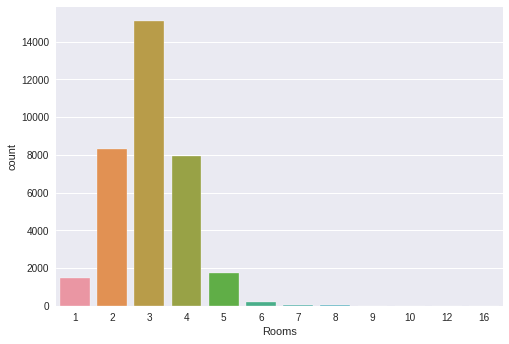

In [37]:
sns.set_style('darkgrid')
plt.style.use('seaborn')
sns.countplot(mel_df['Rooms'])

In [38]:
# Most of the housings in Melbourne have 3 rooms followed by 2 and 4 rooms respectively.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[[Text(0, 0, 'House/Cottage/Villa'),
  Text(0, 0, 'Unit/Duplex'),
  Text(0, 0, 'Townhouse')]]

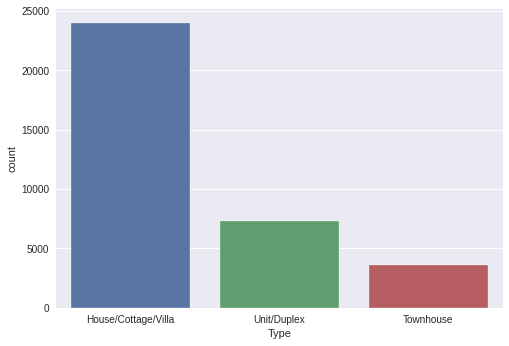

In [49]:
typePlot = sns.countplot(mel_df['Type'])
typePlot.set(xticklabels=['House/Cottage/Villa','Unit/Duplex','Townhouse'])

In [50]:
# Most common type of property in Melbourbe is house/cottage/villa.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


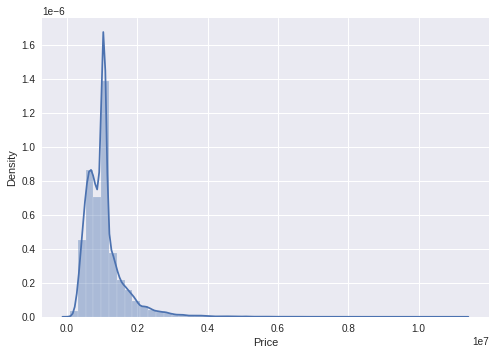

In [52]:
sns.distplot(mel_df['Price'])